In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from urllib3 import request

# Datagen and augmentation

In [18]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
train_gen = datagen.flow_from_directory('PetImages', target_size=(150, 150), batch_size=128, class_mode='binary', subset='training')

valid_gen = datagen.flow_from_directory('PetImages', target_size=(150, 150), batch_size=128, class_mode='binary', subset='validation')

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


# CNN model build

In [19]:
model = Sequential()

#1st layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#2nd layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#3rd layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 74, 74, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 36, 36, 64)       

# Train the model

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_gen, epochs=20, validation_data=valid_gen)

Epoch 1/20
157/157 [==============================] - 421s 3s/step - loss: 1.9979 - accuracy: 0.5929 - val_loss: 0.8607 - val_accuracy: 0.5090
Epoch 2/20
157/157 [==============================] - 441s 3s/step - loss: 0.6234 - accuracy: 0.6651 - val_loss: 1.1553 - val_accuracy: 0.5192
Epoch 3/20
157/157 [==============================] - 438s 3s/step - loss: 0.5681 - accuracy: 0.7031 - val_loss: 1.2185 - val_accuracy: 0.5646
Epoch 4/20
157/157 [==============================] - 281s 2s/step - loss: 0.5384 - accuracy: 0.7243 - val_loss: 0.8477 - val_accuracy: 0.6647
Epoch 5/20
157/157 [==============================] - 268s 2s/step - loss: 0.5213 - accuracy: 0.7391 - val_loss: 1.0170 - val_accuracy: 0.6030
Epoch 6/20
157/157 [==============================] - 364s 2s/step - loss: 0.5029 - accuracy: 0.7509 - val_loss: 1.0061 - val_accuracy: 0.6267
Epoch 7/20
157/157 [==============================] - 334s 2s/step - loss: 0.4857 - accuracy: 0.7638 - val_loss: 0.5711 - val_accuracy: 0.7369

# Plot accuracy and loss

In [ ]:
import matplotlib.pyplot as plt

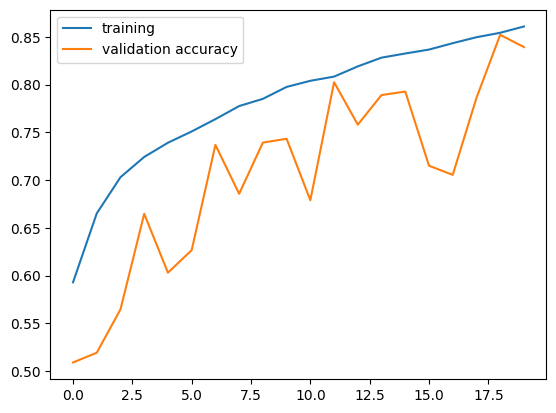

In [27]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(['training', 'validation accuracy'])

In [28]:
#save model
model.save('cat_and_dog_classification.h5')

# Predict from image URL

In [30]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np

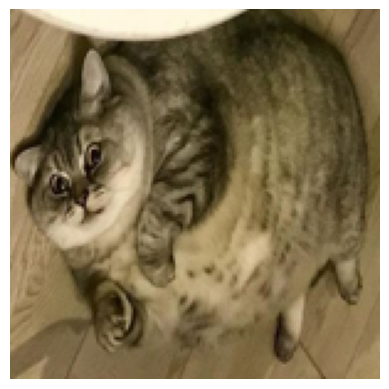

This is an image of a Cat


In [46]:
img_url = "https://file.hstatic.net/200000491469/file/image-3-4_3fc887c9cc6340d696c7460cdd273d12_large.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).convert('RGB').resize((150, 150))

plt.imshow(img)
plt.axis('off')
plt.show()

image_array = image.img_to_array(img)
img =np.expand_dims(image_array, axis=0)
img = img/255.0

prediction = model.predict(img)
threshold = 0.5
prediction = int(prediction[0][0]>threshold)
classes = {v:k for k,v in train_gen.class_indices.items()}

print(f'This is an image of a {classes[prediction]}')

# Predict from local image

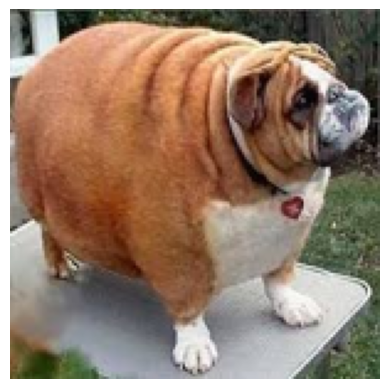

This is an image of a Dog


In [51]:
img_path = "E:\cat_and_dog_classification\images\download (3).jpg"
img = Image.open(img_path).convert('RGB').resize((150, 150))

plt.imshow(img)
plt.axis('off')
plt.show()

image_array = image.img_to_array(img)
img =np.expand_dims(image_array, axis=0)
img = img/255.0

prediction = model.predict(img)
threshold = 0.5
prediction = int(prediction[0][0]>threshold)
classes = {v:k for k,v in train_gen.class_indices.items()}

print(f'This is an image of a {classes[prediction]}')